[[  5  99]
 [  7  86]
 [  8  87]
 [  7  88]
 [  2 111]
 [ 17  86]
 [  2 103]
 [  9  87]
 [  4  94]
 [ 11  78]
 [ 12  77]
 [  9  85]
 [  6  86]]


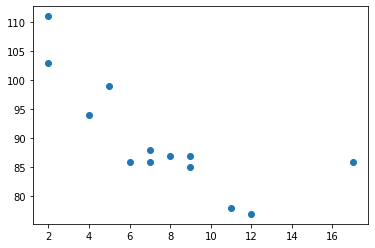

(13, 2)

In [15]:
import matplotlib.pyplot as plt
import numpy as np


x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
new_array=np.array(list(zip(x,y)))   #合并两列表
print(new_array)
plt.scatter(x, y)      #生成散点图
plt.show()
new_array.shape      #读取矩阵长度

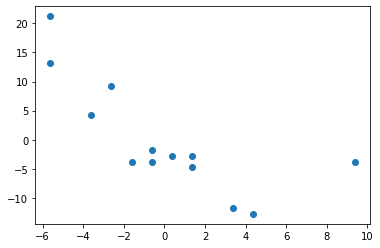

In [16]:
new_array_demean = new_array - np.mean(new_array,axis=0)    #去除每一列的均值
new_test=new_array[:,1]
plt.scatter(new_array_demean[:,0],new_array_demean[:,1])    #第0维取全部元素  第1维取全部元素  
plt.show()

In [17]:
C = new_array_demean.T@new_array_demean/len(new_array)  #计算协方差矩阵  .T:转置  @:矩阵乘法
C

array([[ 16.08284024, -28.16568047],
       [-28.16568047,  85.71597633]])

In [18]:
U,S,V = np.linalg.svd(C)    #奇异值分解计算特征值和特征向量

In [19]:
S

array([95.68220595,  6.11661061])

In [20]:
U

array([[-0.33357603,  0.9427232 ],
       [ 0.9427232 ,  0.33357603]])

In [21]:
U1=U[:,0]    # 将二维转化为一维，取第一个特征值的特征向量
print(U1)

[-0.33357603  0.9427232 ]


In [22]:
new_array_reduction = new_array_demean@U1  #实现降维

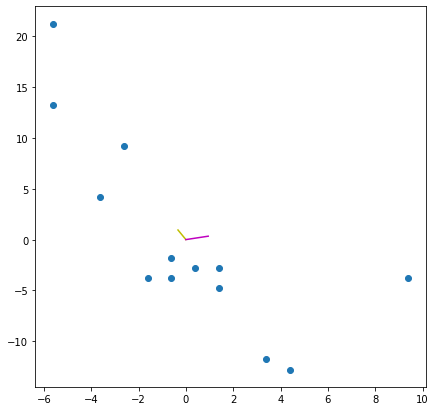

In [23]:
plt.figure(figsize=(7,7))   
plt.scatter(new_array_demean[:,0],new_array_demean[:,1])  
plt.plot([0,U1[0]],[0,U1[1]],c='y')      #画出特征向量
plt.plot([0,U[:,1][0]],[0,U[:,1][1]],c='m')
plt.show()

In [24]:
new_array_restore = new_array_reduction.reshape(13,1)@U1.reshape(1,2)+np.mean(new_array,axis=0)   #还原数据

In [25]:
new_array_reduction.shape,U1.shape  #读取数组长度，判断维度

((13,), (2,))

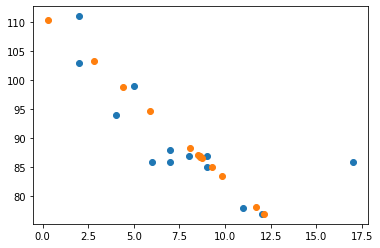

In [26]:
plt.scatter(new_array[:,0],new_array[:,1])     #降维前数据
plt.scatter(new_array_restore[:,0],new_array_restore[:,1])    #应用算法后数据
plt.show()

In [27]:
# 查看保留差异
rv=  np.sum(S[:1])/np.sum(S)
print('{:.2f}%'.format(rv*100))
 

93.99%
